In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('SBI_life_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
rawdata=['Northeast','Northwest','Southeast','Southwest']
region=pd.DataFrame(rawdata,columns=['Region'])

In [4]:
region.head()

,Region
0,Northeast
1,Northwest
2,Southeast
3,Southwest


In [5]:
data.rename(columns={'sex':'sex_male'},inplace=True)

In [6]:
data.isnull().sum()

age               0
sex_male          0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [7]:
data.dtypes

age                 int64
sex_male            int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [8]:
data['insuranceclaim'].unique()

array([1, 0], dtype=int64)

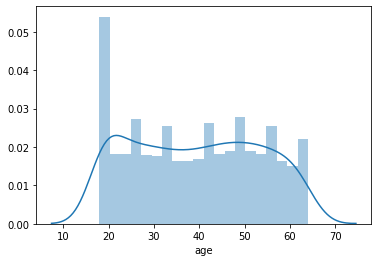

In [9]:
sns.distplot(data.age,bins=20)

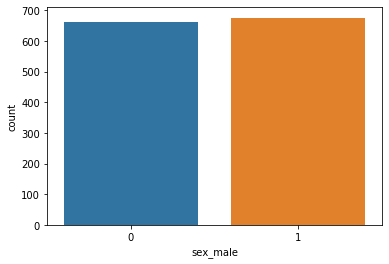

In [10]:
sns.countplot(x=data['sex_male'])

In [11]:
data['sex_male'].value_counts()

1    676
0    662
Name: sex_male, dtype: int64

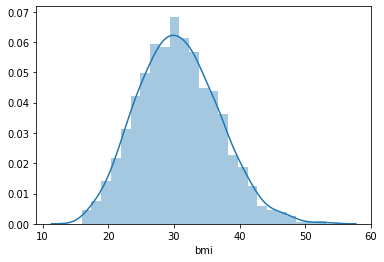

In [12]:
sns.distplot(data['bmi'])

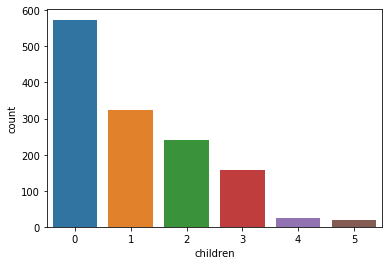

In [13]:
sns.countplot(data['children'])

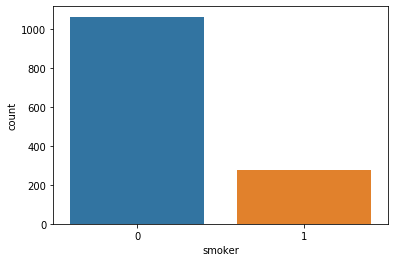

In [14]:
sns.countplot(data['smoker'])

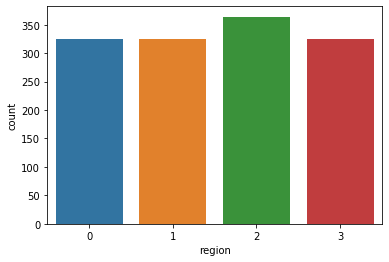

In [15]:
sns.countplot(data['region'])

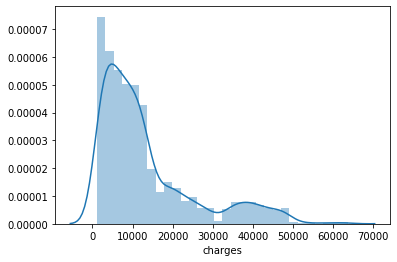

In [16]:
sns.distplot(data.charges)

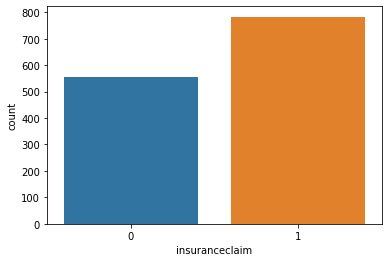

In [17]:
sns.countplot(data.insuranceclaim)

In [18]:
data.corr()

,age,sex_male,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex_male,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


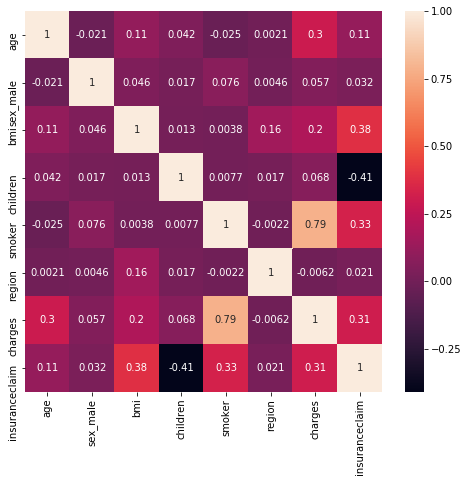

In [19]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [20]:
data.skew()

age               0.055673
sex_male         -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [21]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [22]:
data.skew()

age               0.055673
sex_male         -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

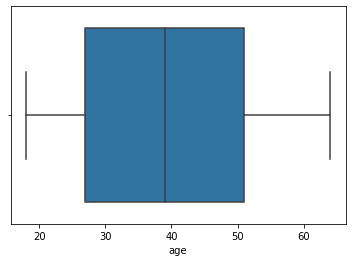

In [23]:
sns.boxplot(data.age)

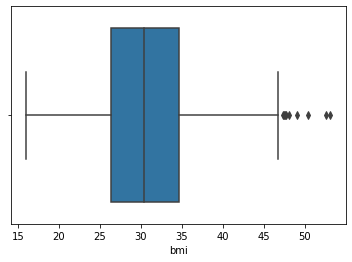

In [24]:
sns.boxplot(data.bmi)

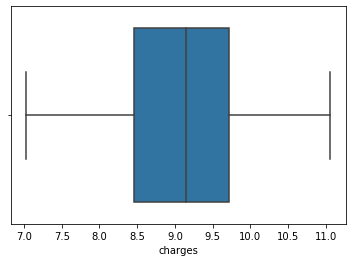

In [25]:
sns.boxplot(data.charges)

In [26]:
from scipy.stats import zscore
z=abs(zscore(data))
print(np.where(z>3))

(array([ 116,  847, 1047, 1317], dtype=int64), array([2, 2, 2, 2], dtype=int64))


In [27]:
data=data[(z<3).all(axis=1)]

In [28]:
data.shape

(1334, 8)

In [29]:
from sklearn.model_selection import train_test_split as tts

In [30]:
data_x=data.drop('insuranceclaim',axis=1)
data_y=data.insuranceclaim

In [31]:
data_x.head()

,age,sex_male,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,0.693147,3,9.734236
1,18,1,33.770,0.693147,0.000000,2,7.453882
2,28,1,33.000,1.386294,0.000000,2,8.400763
3,33,1,22.705,0.000000,0.000000,1,9.998137
4,32,1,28.880,0.000000,0.000000,1,8.260455


In [32]:
x_train,x_test,y_train,y_test=tts(data_x,data_y,stratify=data_y,random_state=0,test_size=0.20)

In [33]:
x_train.shape,y_train.shape

((1067, 7), (1067,))

In [34]:
x_test.shape,y_test.shape

((267, 7), (267,))

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
accuracy=accuracy_score(y_pred,y_test)
accuracy1=accuracy_score(train_pred,y_train)
print(accuracy,accuracy1)

0.8277153558052435 0.8772258669165885


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
x_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [39]:
x_scaled=pd.DataFrame(data=x_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(data=x_test_scaled,columns=x_test.columns)

In [40]:
lr.fit(x_scaled,y_train)
y_pred=lr.predict(x_test_scaled)
train_pred=lr.predict(x_scaled)
accuracy=accuracy_score(y_pred,y_test)
accuracy1=accuracy_score(train_pred,y_train)
print(accuracy,accuracy1)

0.8389513108614233 0.880037488284911


In [41]:
x_scaled.skew()

age         0.071283
sex_male   -0.084543
bmi         0.182739
children    0.254243
smoker      1.447471
region     -0.025911
charges    -0.074375
dtype: float64

In [42]:
data_X=sc.fit_transform(data_x)
data_X=pd.DataFrame(data=data_X,columns=data_x.columns)
data_Y=data_y

In [43]:
accuracy=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_X,data_Y,stratify=data_Y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_y=lr.predict(x_test)
    acc_score=accuracy_score(y_test,pred_y)
    print('Accuracy score is',acc_score,'at random state',i)
    if acc_score>accuracy:
        accuracy=acc_score
        final_state=i
print('max accuracy score is ',accuracy,'at random state',final_state)

Accuracy score is 0.8389513108614233 at random state 0
Accuracy score is 0.8764044943820225 at random state 1
Accuracy score is 0.8614232209737828 at random state 2
Accuracy score is 0.8389513108614233 at random state 3
Accuracy score is 0.8913857677902621 at random state 4
Accuracy score is 0.8726591760299626 at random state 5
Accuracy score is 0.8801498127340824 at random state 6
Accuracy score is 0.8651685393258427 at random state 7
Accuracy score is 0.8389513108614233 at random state 8
Accuracy score is 0.8539325842696629 at random state 9
Accuracy score is 0.8764044943820225 at random state 10
Accuracy score is 0.8576779026217228 at random state 11
Accuracy score is 0.8539325842696629 at random state 12
Accuracy score is 0.8689138576779026 at random state 13
Accuracy score is 0.8726591760299626 at random state 14
Accuracy score is 0.8876404494382022 at random state 15
Accuracy score is 0.8838951310861424 at random state 16
Accuracy score is 0.8801498127340824 at random state 17
Ac

In [44]:
x_train,x_test,y_train,y_test=tts(data_X,data_Y,stratify=data_Y,test_size=0.2,random_state=96)
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
train_pred=lr.predict(x_train)
test_accuracy=accuracy_score(y_test,pred_y)
train_accuracy=accuracy_score(y_train,train_pred)
print('Test accuracy:',test_accuracy,'Train accuracy:',train_accuracy)

Test accuracy: 0.9138576779026217 Train accuracy: 0.8669165885660731


In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [46]:
lr_test_auc=roc_auc_score(y_test,pred_y)
lr_train_auc=roc_auc_score(y_train,train_pred)
lr_test_auc,lr_train_auc

(0.9093901593901593, 0.8611213540988821)

In [47]:
lr_test_probs=lr.predict_proba(x_test)[:,1]
lr_train_probs=lr.predict_proba(x_train)[:,1]

In [48]:
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)

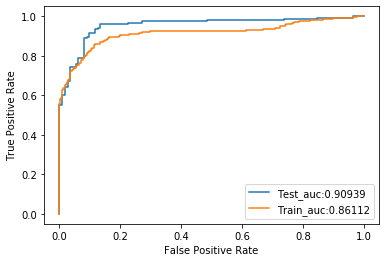

In [49]:
plt.plot(lr_test_fpr,lr_test_tpr,label='Test_auc:0.90939')
plt.plot(lr_train_fpr,lr_train_tpr,label='Train_auc:0.86112')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNC=KNC(n_neighbors=7)
KNC.fit(x_train,y_train)
pred_y=KNC.predict(x_test)
train_pred=KNC.predict(x_train)
test_accuracy=accuracy_score(y_test,pred_y)
train_accuracy=accuracy_score(y_train,train_pred)
print('Test accuracy:',test_accuracy,'Train accuracy:',train_accuracy)


Test accuracy: 0.9063670411985019 Train accuracy: 0.9231490159325211


In [53]:
KNC_test_auc=roc_auc_score(y_test,pred_y)
KNC_train_auc=roc_auc_score(y_train,train_pred)
KNC_test_auc,KNC_train_auc

(0.9029799029799029, 0.9235119951412086)

In [54]:
KNC_test_probs=KNC.predict_proba(x_test)[:,1]
KNC_train_probs=KNC.predict_proba(x_train)[:,1]

In [55]:
KNC_test_fpr,KNC_test_tpr,test_threshold=roc_curve(y_test,KNC_test_probs)
KNC_train_fpr,KNC_train_tpr,train_threshold=roc_curve(y_train,KNC_train_probs)

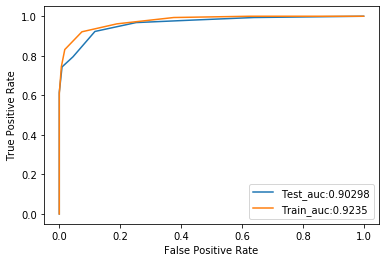

In [56]:
plt.plot(KNC_test_fpr,KNC_test_tpr,label='Test_auc:0.90298')
plt.plot(KNC_train_fpr,KNC_train_tpr,label='Train_auc:0.9235')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [57]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNC=KNC(n_neighbors=7)
max_cv=0
for i in range(5,20):
    cv_res=cvs(KNC,x_train,y_train,scoring='accuracy',cv=i,n_jobs=-1)
    print('cv result is ',np.mean(cv_res),'for cv:',i)
    if np.mean(cv_res)>max_cv:
        max_cv=np.mean(cv_res)
        final_cv=i
print('max cv is:',max_cv,'at cv:',final_cv)
        

cv result is  0.8753047172708858 for cv: 5
cv result is  0.8687710277407478 for cv: 6
cv result is  0.8743734335839598 for cv: 7
cv result is  0.8734130738991305 for cv: 8
cv result is  0.8799445578608092 for cv: 9
cv result is  0.872398394691641 for cv: 10
cv result is  0.8742690023525811 for cv: 11
cv result is  0.8734465440926117 for cv: 12
cv result is  0.8733883487532228 for cv: 13
cv result is  0.87506916642255 for cv: 14
cv result is  0.8741545569714584 for cv: 15
cv result is  0.8761541940646419 for cv: 16
cv result is  0.8788694241137315 for cv: 17
cv result is  0.8741714829967314 for cv: 18
cv result is  0.8771267283040135 for cv: 19
max cv is: 0.8799445578608092 at cv: 9


In [58]:
from sklearn.naive_bayes import GaussianNB as GNB
GNB=GNB()
from sklearn.metrics import confusion_matrix

In [59]:
GNB.fit(x_train,y_train)
y_pred=GNB.predict(x_test)
train_pred=GNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
cm=confusion_matrix(y_test,y_pred)
cm

0.8202247191011236 0.7835051546391752


array([[101,  10],
       [ 38, 118]], dtype=int64)

In [60]:
from sklearn.naive_bayes import BernoulliNB as BNB
BNB=BNB(alpha=8)
BNB.fit(x_train,y_train)
y_pred=BNB.predict(x_test)
train_pred=BNB.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
cm=confusion_matrix(y_test,y_pred)
cm

0.7827715355805244 0.7488284910965324


array([[ 85,  26],
       [ 32, 124]], dtype=int64)

In [61]:
for i in range(1,11):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(max_depth=i,random_state=0,criterion='entropy')
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at depth:',i,'test accuracy:',accuracy,'train accuracy:',accuracy1)

at depth: 1 test accuracy: 0.7191011235955056 train accuracy: 0.7216494845360825
at depth: 2 test accuracy: 0.8127340823970037 train accuracy: 0.7525773195876289
at depth: 3 test accuracy: 0.8801498127340824 train accuracy: 0.8416119962511716
at depth: 4 test accuracy: 0.8689138576779026 train accuracy: 0.8753514526710403
at depth: 5 test accuracy: 0.898876404494382 train accuracy: 0.8978444236176195
at depth: 6 test accuracy: 0.9101123595505618 train accuracy: 0.9343955014058107
at depth: 7 test accuracy: 0.947565543071161 train accuracy: 0.9465791940018744
at depth: 8 test accuracy: 0.9588014981273408 train accuracy: 0.9587628865979382
at depth: 9 test accuracy: 0.9625468164794008 train accuracy: 0.9643861293345829
at depth: 10 test accuracy: 0.9438202247191011 train accuracy: 0.9700093720712277


In [62]:
DTC_test_auc=roc_auc_score(y_test,y_pred)
DTC_train_auc=roc_auc_score(y_train,train_pred)
DTC_test_auc,DTC_train_auc

(0.9029799029799029, 0.9649346376874467)

In [63]:
DTC_test_probs=DTC.predict_proba(x_test)[:,1]
DTC_train_probs=DTC.predict_proba(x_train)[:,1]

In [64]:
DTC_test_fpr,DTC_test_tpr,test_threshold=roc_curve(y_test,DTC_test_probs)
DTC_train_fpr,DTC_train_tpr,train_threshold=roc_curve(y_train,DTC_train_probs)

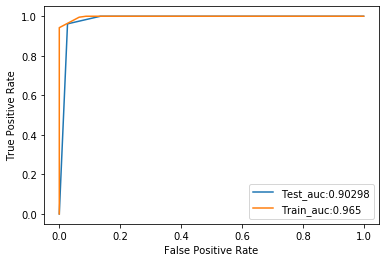

In [65]:
plt.plot(DTC_test_fpr,DTC_test_tpr,label='Test_auc:0.90298')
plt.plot(DTC_train_fpr,DTC_train_tpr,label='Train_auc:0.965')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [130]:
for i in range(1,11):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(max_depth=i,random_state=0,criterion='gini')
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at depth:',i,'test accuracy:',accuracy,'train accuracy:',accuracy1)

at depth: 1 test accuracy: 0.7191011235955056 train accuracy: 0.7216494845360825
at depth: 2 test accuracy: 0.8127340823970037 train accuracy: 0.7525773195876289
at depth: 3 test accuracy: 0.8801498127340824 train accuracy: 0.8416119962511716
at depth: 4 test accuracy: 0.8689138576779026 train accuracy: 0.8753514526710403
at depth: 5 test accuracy: 0.898876404494382 train accuracy: 0.8978444236176195
at depth: 6 test accuracy: 0.9176029962546817 train accuracy: 0.9353327085285849
at depth: 7 test accuracy: 0.947565543071161 train accuracy: 0.9465791940018744
at depth: 8 test accuracy: 0.9588014981273408 train accuracy: 0.9587628865979382
at depth: 9 test accuracy: 0.9588014981273408 train accuracy: 0.9662605435801312
at depth: 10 test accuracy: 0.9700374531835206 train accuracy: 0.9728209934395501


In [131]:
DTC_test_auc=roc_auc_score(y_test,y_pred)
DTC_train_auc=roc_auc_score(y_train,train_pred)
DTC_test_auc,DTC_train_auc

(0.9704608454608455, 0.9767255216693419)

In [68]:
DTC_test_probs=DTC.predict_proba(x_test)[:,1]
DTC_train_probs=DTC.predict_proba(x_train)[:,1]

In [69]:
DTC_test_fpr,DTC_test_tpr,test_threshold=roc_curve(y_test,DTC_test_probs)
DTC_train_fpr,DTC_train_tpr,train_threshold=roc_curve(y_train,DTC_train_probs)

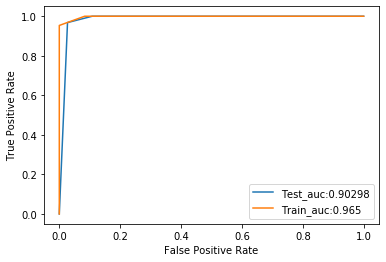

In [70]:
plt.plot(DTC_test_fpr,DTC_test_tpr,label='Test_auc:0.90298')
plt.plot(DTC_train_fpr,DTC_train_tpr,label='Train_auc:0.9767')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [71]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[108,   3],
       [  5, 151]], dtype=int64)

In [72]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=20)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [74]:
accuracy=grid_search.best_score_
accuracy

0.9062792877225867

In [75]:
grid_search.best_params_

{'C': 100, 'gamma': 0.2, 'kernel': 'rbf'}

In [127]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=15,C=100,gamma=0.2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
train_pred=classifier.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)

0.9138576779026217 0.9728209934395501


In [128]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 97,  14],
       [  9, 147]], dtype=int64)

In [129]:
SVC_test_auc=roc_auc_score(y_test,y_pred)
SVC_train_auc=roc_auc_score(y_train,train_pred)
SVC_test_auc,SVC_train_auc

(0.9080907830907831, 0.9767255216693419)

In [79]:
for i in range(0,100):
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC(random_state=i,criterion='entropy')
    RFC.fit(x_train,y_train)
    y_pred=RFC.predict(x_test)
    train_pred=RFC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at random state ',i,'test accuracy:',accuracy,'train accuracy:',accuracy1)

at random state  0 test accuracy: 0.9662921348314607 train accuracy: 0.9990627928772259
at random state  1 test accuracy: 0.9438202247191011 train accuracy: 0.993439550140581
at random state  2 test accuracy: 0.9625468164794008 train accuracy: 0.9990627928772259
at random state  3 test accuracy: 0.9213483146067416 train accuracy: 0.9990627928772259
at random state  4 test accuracy: 0.951310861423221 train accuracy: 0.9981255857544518
at random state  5 test accuracy: 0.951310861423221 train accuracy: 0.9971883786316776
at random state  6 test accuracy: 0.9400749063670412 train accuracy: 0.9981255857544518
at random state  7 test accuracy: 0.947565543071161 train accuracy: 0.9990627928772259
at random state  8 test accuracy: 0.9325842696629213 train accuracy: 0.9971883786316776
at random state  9 test accuracy: 0.9213483146067416 train accuracy: 0.9962511715089035
at random state  10 test accuracy: 0.947565543071161 train accuracy: 1.0
at random state  11 test accuracy: 0.95880149812734

at random state  97 test accuracy: 0.9363295880149812 train accuracy: 0.9990627928772259
at random state  98 test accuracy: 0.9438202247191011 train accuracy: 0.9990627928772259
at random state  99 test accuracy: 0.9363295880149812 train accuracy: 1.0


In [125]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(random_state=11,criterion='entropy')
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
train_pred=RFC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)

0.9588014981273408 1.0


In [126]:
RFC_test_auc=roc_auc_score(y_test,y_pred)
RFC_train_auc=roc_auc_score(y_train,train_pred)
RFC_test_auc,RFC_train_auc

(0.9582467082467084, 1.0)

In [82]:
for i in range(0,100):
    from sklearn.ensemble import RandomForestClassifier as RFC
    RFC=RFC(random_state=i,criterion='gini')
    RFC.fit(x_train,y_train)
    y_pred=RFC.predict(x_test)
    train_pred=RFC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print('at random state ',i,'test accuracy:',accuracy,'train accuracy:',accuracy1)

at random state  0 test accuracy: 0.9438202247191011 train accuracy: 0.9953139643861293
at random state  1 test accuracy: 0.951310861423221 train accuracy: 0.9953139643861293
at random state  2 test accuracy: 0.947565543071161 train accuracy: 1.0
at random state  3 test accuracy: 0.9363295880149812 train accuracy: 0.9962511715089035
at random state  4 test accuracy: 0.947565543071161 train accuracy: 0.9962511715089035
at random state  5 test accuracy: 0.947565543071161 train accuracy: 0.9943767572633552
at random state  6 test accuracy: 0.9250936329588015 train accuracy: 0.9990627928772259
at random state  7 test accuracy: 0.9363295880149812 train accuracy: 0.9990627928772259
at random state  8 test accuracy: 0.9250936329588015 train accuracy: 0.9990627928772259
at random state  9 test accuracy: 0.9662921348314607 train accuracy: 0.9990627928772259
at random state  10 test accuracy: 0.9662921348314607 train accuracy: 1.0
at random state  11 test accuracy: 0.9550561797752809 train accur

at random state  97 test accuracy: 0.947565543071161 train accuracy: 0.9981255857544518
at random state  98 test accuracy: 0.9400749063670412 train accuracy: 0.9990627928772259
at random state  99 test accuracy: 0.9550561797752809 train accuracy: 0.9990627928772259


In [123]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(random_state=88,criterion='gini')
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
train_pred=RFC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)


0.9775280898876404 1.0


In [124]:
RFC_test_auc=roc_auc_score(y_test,y_pred)
RFC_train_auc=roc_auc_score(y_train,train_pred)
print(RFC_test_auc,RFC_train_auc)
cm=confusion_matrix(y_test,y_pred)
cm

0.9768711018711019 1.0


array([[108,   3],
       [  3, 153]], dtype=int64)

In [96]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC=RFC(n_estimators=15,max_depth=6,criterion='entropy',random_state=43)
for i in range(0,15):
    from sklearn.ensemble import AdaBoostClassifier as ABC
    ABC=ABC(base_estimator=RFC,learning_rate=0.5,random_state=i)
    ABC.fit(x_train,y_train)
    y_pred=ABC.predict(x_test)
    train_pred=ABC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy at :',i,'is:',accuracy)

accuracy at : 0 is: 0.9588014981273408
accuracy at : 1 is: 0.951310861423221
accuracy at : 2 is: 0.9662921348314607
accuracy at : 3 is: 0.947565543071161
accuracy at : 4 is: 0.951310861423221
accuracy at : 5 is: 0.9588014981273408
accuracy at : 6 is: 0.9625468164794008
accuracy at : 7 is: 0.9588014981273408
accuracy at : 8 is: 0.9625468164794008
accuracy at : 9 is: 0.951310861423221
accuracy at : 10 is: 0.9625468164794008
accuracy at : 11 is: 0.9550561797752809
accuracy at : 12 is: 0.9625468164794008
accuracy at : 13 is: 0.9550561797752809
accuracy at : 14 is: 0.9625468164794008


In [97]:
from sklearn.ensemble import AdaBoostClassifier as ABC
ABC=ABC(base_estimator=RFC,learning_rate=0.5,random_state=i)
ABC.fit(x_train,y_train)
y_pred=ABC.predict(x_test)
train_pred=ABC.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)

0.9625468164794008 1.0


In [122]:
ABC_test_auc=roc_auc_score(y_test,y_pred)
ABC_train_auc=roc_auc_score(y_train,train_pred)
print(ABC_test_auc,ABC_train_auc)
cm=confusion_matrix(y_test,y_pred)
cm

0.990990990990991 1.0


array([[109,   2],
       [  0, 156]], dtype=int64)

In [99]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [103]:
for i in range(0,50):
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    GBC=GBC(learning_rate=0.4,max_depth=7,random_state=i,n_estimators=200)
    GBC.fit(x_train,y_train)
    y_pred=GBC.predict(x_test)
    train_pred=GBC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    print(accuracy,accuracy1)


0.9925093632958801 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9925093632958801 1.0
0.9925093632958801 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9925093632958801 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9925093632958801 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9887640449438202 1.0
0.9925093632958801 1.0
0.9887640449438202 1.0
0.9925093632958801 1.0
0.9887640449438202 1.0
0.9925093632958801 1.0
0.988764044

In [117]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
GBC=GBC(learning_rate=0.4,max_depth=7,random_state=0,n_estimators=100)
GBC.fit(x_train,y_train)
pred_y=GBC.predict(x_test)
train_pred=GBC.predict(x_train)
accuracy=accuracy_score(y_test,pred_y)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)

0.9925093632958801 1.0


In [118]:
GBC_test_auc=roc_auc_score(y_test,pred_y)
GBC_train_auc=roc_auc_score(y_train,train_pred)
print(GBC_test_auc,GBC_train_auc)
cm=confusion_matrix(y_test,y_pred)
cm

0.990990990990991 1.0


array([[109,   2],
       [  0, 156]], dtype=int64)

In [119]:
GBC_test_probs=GBC.predict_proba(x_test)
GBC_train_probs=GBC.predict_proba(x_train)
GBC_test_probs=GBC_test_probs[:,1]
GBC_train_probs=GBC_train_probs[:,1]

In [120]:
GBC_test_fpr,GBC_test_tpr,test_threshold=roc_curve(y_test,GBC_test_probs)
GBC_train_fpr,GBC_train_tpr,train_threshold=roc_curve(y_train,GBC_train_probs)

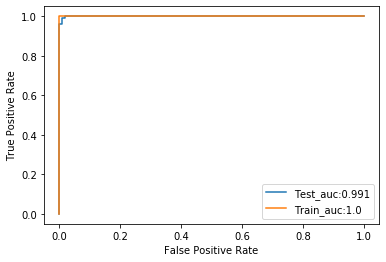

In [135]:
plt.plot(GBC_test_fpr,GBC_test_tpr,label='Test_auc:0.991')
plt.plot(GBC_train_fpr,GBC_train_tpr,label='Train_auc:1.0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [134]:
from sklearn.externals import joblib
joblib.dump(GBC,'Gradient_boosting_classifier.pkl')

['Gradient_boosting_classifier.pkl']